# Twitter Disaster Classification project


## 1. Importing necessary libraries

In [1]:
!pip install wordcloud 

In [2]:
!pip install nltk

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

## 2. Import the Dataset

In [2]:
tweets_data = pd.read_csv('TwitterDisasterData 1 meeting.csv')
tweets_data

Tweets  Likes  Target
0    A million Russians have signed a petition in o...      1       1
1               Monetize your tsunami through trapping      0       0
2    @regina_bateson you live in a papier mache rea...      0       0
3    Penn State ran into the offensive tsunami Sund...      1       0
4    @jencyjac @govindethiraj First to go in a tsun...      0       0
..                                                 ...    ...     ...
235  Russia-Ukraine war latest news: ‘dozens of peo...      0       1
236  #Putin killed dozens of civilians by shelling ...      0       1
237  @coastiecoasting @Coley_A_P @Mujeebtalks @IAPo...      0       1
238  @Twitter @verified why are you not suspending/...      0       0
239  @coco_coindreau @IgorKossov So hopefully those...      0       0

[240 rows x 3 columns]

## 3. Data undeerstanding

In [3]:
tweets_data.shape

(240, 3)

In [4]:
tweets_data.isna().sum()

Tweets    0
Likes     0
Target    0
dtype: int64

In [5]:
tweets_data.dtypes

Tweets    object
Likes      int64
Target     int64
dtype: object

#### visualizing the missing values 

In [6]:
plt.figure(figsize=(16,4))
sns.heatmap(tweets_data.isnull())
plt.show()

#### We can see that there are no null values 

## 4. Data pre-processing and analysis

In [7]:
tweets_data.head(5)

Tweets  Likes  Target
0  A million Russians have signed a petition in o...      1       1
1             Monetize your tsunami through trapping      0       0
2  @regina_bateson you live in a papier mache rea...      0       0
3  Penn State ran into the offensive tsunami Sund...      1       0
4  @jencyjac @govindethiraj First to go in a tsun...      0       0

In [8]:
tweets_data.Tweets[50]

"@KatyJayne101 Won't we then have a very angry volcano to deal with?"

In [9]:
tweets_data.Tweets[200]

"There is no way that our government can be silent about this attempted massacre if it's not the one who sent this JMPD hooligans to kill us. #JusticeForPastorMukhubaChurch https://t.co/BBAQ5HdGqf"

In [10]:
tweets_data.drop('Likes',inplace = True, axis =1)
tweets_data.head(5)

Tweets  Target
0  A million Russians have signed a petition in o...       1
1             Monetize your tsunami through trapping       0
2  @regina_bateson you live in a papier mache rea...       0
3  Penn State ran into the offensive tsunami Sund...       0
4  @jencyjac @govindethiraj First to go in a tsun...       0

#### lowering the text 

In [11]:
def lower(Tweets:str):
    Tweets = Tweets.lower()
    return Tweets
tweets_data['Tweets']= tweets_data['Tweets'].apply(lower)

In [12]:
tweets_data.Tweets[50]

"@katyjayne101 won't we then have a very angry volcano to deal with?"

#### Cleaning the text 

In [13]:
def textCleaning(Tweets):
    op = re.sub(r'@[A-Za-z0-9]+', ' ', Tweets) #removed @mentions
    op = re.sub(r'#[A-Za-z0-9]+',' ', op) #removing the # symbol
    op = re.sub('https://[a-zA-z0-9/\.]+',' ',op) #Removing hyperlink
    op = re.sub('[^a-zA-Z0-9]+',' ',op)#Removing emojis
    op = re.sub(r'\b\d+\b',' ',op)# removing numbers
    op = re.sub(r'\b\d+(th)?\b',' ',op)
    op = re.sub('\s+',' ',op)#removing unwanted spaces
    op = re.sub(r' s ',' ',op)
    op = re.sub('\w*\d\w*',' ',op)# removing words containing numbers
    return op
tweets_data['Tweets'] = tweets_data['Tweets'].apply(textCleaning)

In [14]:
tweets_data.head(5)

Tweets  Target
0  a million russians have signed a petition in o...       1
1             monetize your tsunami through trapping       0
2   bateson you live in a papier mache reality st...       0
3  penn state ran into the offensive tsunami sund...       0
4          first to go in a tsunami or a tidal wave        0

In [15]:
sns.displot(tweets_data.Target)

In [16]:
tweets_data['Target'].value_counts()

0    147
1     93
Name: Target, dtype: int64

In [17]:
tweets_data.Tweets[33]

'ipo mania san francisco braces for earthquake of new tech millionaires '

### Text visualization using WordCloud

In [18]:
tweets_data.Tweets

0      a million russians have signed a petition in o...
1                 monetize your tsunami through trapping
2       bateson you live in a papier mache reality st...
3      penn state ran into the offensive tsunami sund...
4              first to go in a tsunami or a tidal wave 
                             ...                        
235    russia ukraine war latest news dozens of peopl...
236     killed dozens of civilians by shelling civili...
237     a p so did russians killed underground politi...
238     why are you not suspending blocking russia pr...
239     coindreau so hopefully those who bombed belgr...
Name: Tweets, Length: 240, dtype: object

In [19]:
full_txt = ' '.join(tweets_data.Tweets[tweets_data.Target == 1])

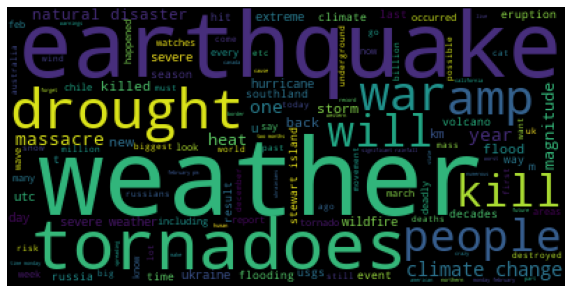

In [20]:
wc = WordCloud()
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
display(tweets_data['Tweets'].to_string())

'0      a million russians have signed a petition in o...\n1                 monetize your tsunami through trapping\n2       bateson you live in a papier mache reality st...\n3      penn state ran into the offensive tsunami sund...\n4              first to go in a tsunami or a tidal wave \n5                                              castillo \n6      everytime i think about how hard finana popped...\n7                          have you heard tsunami by on \n8      usgs reports a   earthquake km se of mina neva...\n9       magnitude earthquake occurred at copper river...\n10     there was an earthquake in at   this morning s...\n11      every earthquake i m a bad person but reasona...\n12     usgs reports a   earthquake km sse of nelchina...\n13      earthquake rattles los angeles and ventura co...\n14                   magnitude km from ak united states \n15     chappelle home team earthquake legendary   tv ...\n16     in they debuted in jp with btd he said there a...\n17      my bo

## Tokenization

In [22]:
token = nltk.tokenize.RegexpTokenizer(r'\w+')
# apply token
tweets_data.Tweets = tweets_data.Tweets.apply(lambda x:token.tokenize(x))
# viewing the data 
display(tweets_data.Tweets.head())

0    [a, million, russians, have, signed, a, petiti...
1         [monetize, your, tsunami, through, trapping]
2    [bateson, you, live, in, a, papier, mache, rea...
3    [penn, state, ran, into, the, offensive, tsuna...
4    [first, to, go, in, a, tsunami, or, a, tidal, ...
Name: Tweets, dtype: object

In [23]:
tweets_data['Tweets'].head()

0    [a, million, russians, have, signed, a, petiti...
1         [monetize, your, tsunami, through, trapping]
2    [bateson, you, live, in, a, papier, mache, rea...
3    [penn, state, ran, into, the, offensive, tsuna...
4    [first, to, go, in, a, tsunami, or, a, tidal, ...
Name: Tweets, dtype: object

## Removal of stop words

In [24]:
nltk.download('stopwords')
def remove_stopwords(Tweets):
    Tweets = [word for word in Tweets if word not in stopwords.words('english')]
    return Tweets
tweets_data['Tweets']=tweets_data['Tweets'].apply(lambda x: remove_stopwords(x))
tweets_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naga1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tweets  Target
0  [million, russians, signed, petition, oppositi...       1
1                      [monetize, tsunami, trapping]       0
2  [bateson, live, papier, mache, reality, stone,...       0
3  [penn, state, ran, offensive, tsunami, sunday,...       0
4                  [first, go, tsunami, tidal, wave]       0

In [25]:
tweets_data.Tweets[200]

['way',
 'government',
 'silent',
 'attempted',
 'massacre',
 'one',
 'sent',
 'jmpd',
 'hooligans',
 'kill',
 'us']

## Stemming

In [26]:
# stemming the text and joining them
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stem_text(Tweets):
    Tweets = [ps.stem(word) for word in Tweets]
    return Tweets
tweets_data['Tweets'] = tweets_data['Tweets'].apply(lambda x: stem_text(x))

In [27]:
tweets_data.Tweets.head()

0    [million, russian, sign, petit, opposit, war, ...
1                               [monet, tsunami, trap]
2    [bateson, live, papier, mach, realiti, stone, ...
3    [penn, state, ran, offens, tsunami, sunday, fa...
4                    [first, go, tsunami, tidal, wave]
Name: Tweets, dtype: object

## Text vectorization using countvectorizer

In [28]:
#cv1 = CountVectorizer(analyzer=stem_text)
#tweets_vector = cv1.fit_transform(tweets_data['Tweets'])
#print(tweets_vector.shape)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer(analyzer = stem_text)
tweets_tfidif =tfidf_transformer.fit_transform(tweets_data['Tweets']).toarray()

In [30]:
tweets_tfidif.shape

(240, 1508)

In [ ]:
#-------------------------


### Splitting the data 

In [32]:
X = tweets_tfidif
y = tweets_data['Target']

In [36]:
#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X,y)
#print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 147), (1, 147)] (294,)


In [34]:
smote = SMOTE()

In [35]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [36]:
print('smote:' ,Counter(y_train_smote))

smote: Counter({1: 119, 0: 119})


In [47]:
from sklearn import metrics
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_smote,y_train_smote)

SVC(kernel='linear')

In [48]:
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print('Accuracy: ',score)
metrics.confusion_matrix(y_test, pred)

Accuracy:  0.75


array([[24,  4],
       [ 8, 12]], dtype=int64)

## Making a predictive system

In [35]:
y_test

109    0
71     0
37     1
74     0
108    1
227    0
156    0
220    1
152    0
194    1
76     1
202    0
83     1
157    1
234    1
134    0
184    0
111    0
221    0
8      1
101    0
179    0
89     1
122    0
5      0
22     1
199    0
97     0
12     1
166    0
55     1
44     0
149    0
125    0
144    0
118    1
145    1
170    1
64     1
92     0
154    0
45     0
219    1
18     1
106    0
15     1
104    0
7      0
Name: Target, dtype: int64

In [43]:
y_train

135    0
64     1
20     1
46     0
150    0
      ..
251    1
192    1
117    0
47     0
172    1
Name: Target, Length: 235, dtype: int64

In [80]:
X_new = X_test[0]
X_new_np = np.asarray(X_new)
X_new_reshape = X_new_np.reshape(1,-1)
prediction = clf.predict(X_new_reshape)
print(prediction)

[0]


## Saving the model 

In [37]:
## lowering, cleaning, tokenization, removal of stop words, stemming, countvectorizer, tfdif, svm


In [60]:
import pickle 
pickle.dump(tfidf_transformer,open('tfidif.pkl', 'wb'))
pickle.dump(clf, open('model.pkl','wb'))